#### python libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nose.tools

#### plot style

In [2]:
plt.style.use('fivethirtyeight')

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

#### read the given dataset

In [3]:
income_data = pd.read_csv('data/adult.data',sep=r',\s+', header=None,engine='python')
income_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### specify column names for better orientation in the dataset

In [4]:
income_data.columns = [
    'age',
    'workclass',
    'fnlwgt',
    'edu',
    'edu_n',
    'marital_stat',
    'occ',
    'relp',
    'race',
    'sex',
    'gains',
    'losses',
    'h_per_week',
    'country',
    'income_class',
]

#### show the dataset with the named columns

In [5]:
income_data

,age,workclass,fnlwgt,edu,edu_n,marital_stat,occ,relp,race,sex,gains,losses,h_per_week,country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### get the dtypes of the features

In [6]:
income_data.dtypes

age              int64
workclass       object
fnlwgt           int64
edu             object
edu_n            int64
marital_stat    object
occ             object
relp            object
race            object
sex             object
gains            int64
losses           int64
h_per_week       int64
country         object
income_class    object
dtype: object

#### check if 'sex' and 'income_class' are good for categorical type

In [7]:
income_data.sex.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
income_data.income_class.unique()

array(['<=50K', '>50K'], dtype=object)

#### change the dtype of these features

In [9]:
income_data.sex = pd.Categorical(income_data.sex)
income_data.income_class = pd.Categorical(income_data.income_class)

In [10]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
edu               object
edu_n              int64
marital_stat      object
occ               object
relp              object
race              object
sex             category
gains              int64
losses             int64
h_per_week         int64
country           object
income_class    category
dtype: object

#### get described dataframe

In [11]:
income_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
edu_n,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
gains,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
losses,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
h_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           32561 non-null  int64   
 1   workclass     32561 non-null  object  
 2   fnlwgt        32561 non-null  int64   
 3   edu           32561 non-null  object  
 4   edu_n         32561 non-null  int64   
 5   marital_stat  32561 non-null  object  
 6   occ           32561 non-null  object  
 7   relp          32561 non-null  object  
 8   race          32561 non-null  object  
 9   sex           32561 non-null  category
 10  gains         32561 non-null  int64   
 11  losses        32561 non-null  int64   
 12  h_per_week    32561 non-null  int64   
 13  country       32561 non-null  object  
 14  income_class  32561 non-null  category
dtypes: category(2), int64(6), object(7)
memory usage: 3.3+ MB


In [13]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [14]:
# def get_num_people_with_high_income(dataframe):
#     income_data_hihg_income = dataframe[dataframe.income_class  =='>50K'].count().income_class
#     return income_data_hihg_income

In [15]:
def get_num_people_with_high_income(dataframe):
        result = dataframe.income_class == '>50K'
        return result.sum()

In [16]:
high_income_count = get_num_people_with_high_income(income_data)
print(f'There are {high_income_count} high-income people in the dataset')

There are 7841 high-income people in the dataset


In [17]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

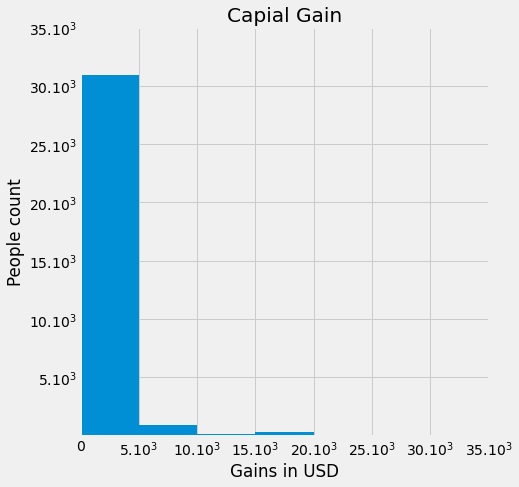

In [18]:
plt.figure(1, figsize=(7,7))
plt.subplot(1, 1, 1)
plt.hist(income_data.gains, bins=20)
plt.title('Capial Gain')
plt.xlabel('Gains in USD')
plt.ylabel('People count')
plt.xlim(0, 35*10**3)
plt.ylim(0, 35*10**3)
plt.xticks(range(0, 40*10**3, 5*10**3), [0 if i == 0 else f'{i}$.10^3$' for i in range(0, 40, 5)])
plt.yticks(range(0, 40*10**3, 5*10**3), [f'{i}$.10^3$' for i in range(0, 40, 5)])
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False) # set y(0) to invisivle
plt.gca().set_aspect('equal')
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [19]:
# def get_num_people_with_higher_gain(dataframe, threshold_gain):
#     return dataframe[dataframe.gains  >= threshold_gain].count().income_class

In [20]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    result = dataframe.gains >= threshold_gain
    return result.sum()

#### test

In [21]:
print(get_num_people_with_higher_gain(income_data, 60000))

159


In [22]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

#### get marital status data like dict

In [23]:
marital_stat_data = income_data.groupby("marital_stat").size().to_dict()
marital_stat_data

{'Divorced': 4443,
 'Married-AF-spouse': 23,
 'Married-civ-spouse': 14976,
 'Married-spouse-absent': 418,
 'Never-married': 10683,
 'Separated': 1025,
 'Widowed': 993}

#### get values from marital status data for value array in pie chart

In [24]:
values = [value for value in marital_stat_data.values()]
values

[4443, 23, 14976, 418, 10683, 1025, 993]

#### get keys from marital status data for labels array in pie chart

In [25]:
labels = [label for label in marital_stat_data]
labels

['Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed']

#### set explode distance betwwen pie chart bars

In [26]:
explode = [0.02 for _ in marital_stat_data.values()]

#### plot the result in pie chart

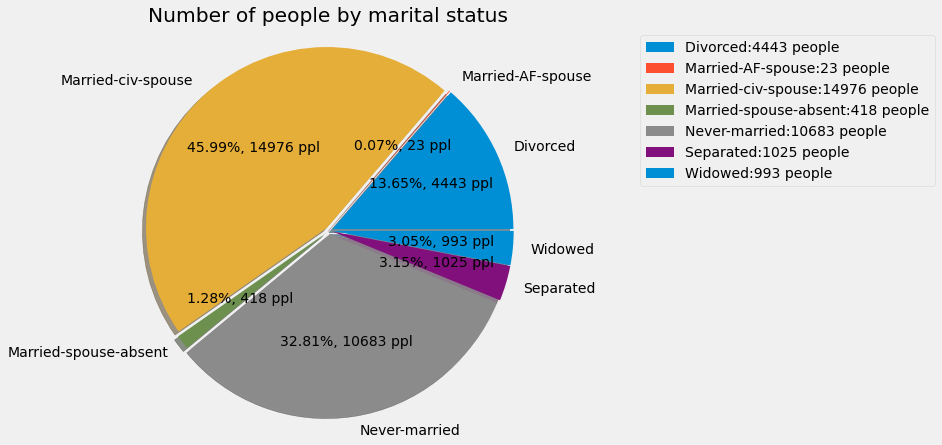

In [46]:
plt.figure(1, figsize=(7,7))
plt.subplot(1, 1, 1)
plt.title('Number of people by marital status')
plt.pie(
    x=values,
    labels=labels,
    autopct=lambda p: f'{p:.2f}%, {(p * sum(values) / 100):.0f} ppl',
    pctdistance=0.6, 
    labeldistance=1.1,
    explode=explode,
    shadow=True,
    startangle=0,
)
plt.legend(
    [f'{label}:{value} people' for label, value in marital_stat_data.items()],
    loc=1,
    bbox_to_anchor=(1, 0.5, 0.9, 0.5),
)
plt.axis("equal")
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

#### solution with python iteration

In [28]:
# def most_prominent_marital_status(dataframe):
#     status = ''
#     num_people = 0
#     status, num_people = max(marital_stat_data.items(), key = lambda x: x[1])
#     return status, num_people

#### solution using other column to keep the count result

In [29]:
# def most_prominent_marital_status(dataframe):
#     status = ""
#     num_people = 0
#     all_statuses = dataframe.loc[:, ["marital_stat", "age"]].groupby(by=["marital_stat"], as_index=False).count()
#     all_statuses_highest = all_statuses.sort_values('age', ascending=False)
#     status = all_statuses_highest.iloc[0]['marital_stat']
#     num_people = all_statuses_highest.iloc[0]['age']
#     return (status, num_people)

#### solution with new df

In [30]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    marital_stat_data = dataframe.groupby("marital_stat").size().to_dict()
    new_df = pd.DataFrame(
        data=list(marital_stat_data.items()),
        index=[i for i in range(len(marital_stat_data))],
        columns=['stat_name', 'counts']
    )
    sorted_new_df = new_df.sort_values('counts', ascending=False)
    status, num_people = sorted_new_df.iloc[0]
    return status, num_people

#### test

In [31]:
print(most_prominent_marital_status(income_data))

('Married-civ-spouse', 14976)


In [32]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

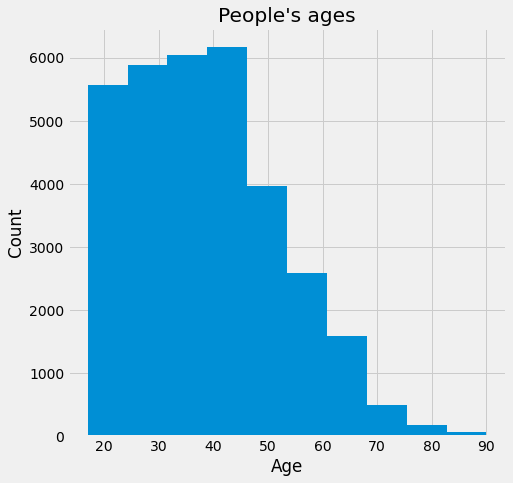

In [33]:
plt.figure(1, figsize=(7,7))
plt.subplot(1, 1, 1)
plt.hist(income_data.age)
plt.title("People's ages")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [34]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    young = dataframe[dataframe.age<=30].age.count()
    middle_aged = dataframe[(dataframe.age>30) & (dataframe.age<=60)].age.count()
    old = dataframe[dataframe.age>60].age.count()
    return young, middle_aged, old

#### test

In [35]:
print(get_num_people_by_age_category(income_data))

(10572, 19657, 2332)


In [36]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

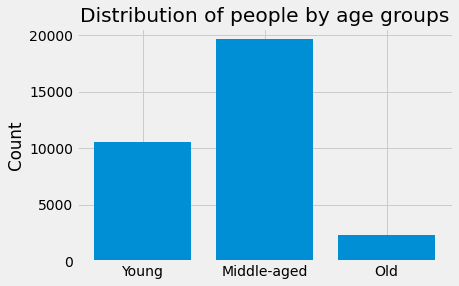

In [37]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

#### solution with new df

In [38]:
# def get_second_highest_num_people(dataframe):
#     num_people, country = 0, ""
#     country_data = income_data.country.value_counts()
#     new_df = pd.DataFrame(
#         data=country_data,
#     )
#     new_df.reset_index(level=0, inplace=True)
#     new_df.columns = ['country', 'counts']
#     country, num_people  = new_df.iloc[1]
#     return num_people, country

#### solution only with Series

In [39]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    country_data = income_data.country.value_counts()
    country = country_data.index[1]
    num_people = country_data.values[1]
    return num_people, country

#### test

In [40]:
print(get_second_highest_num_people(income_data))

(643, 'Mexico')


In [41]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [42]:
def get_mean_working_hours_by_income(dataframe):
    result = dataframe.groupby(['occ']).h_per_week.mean().sort_values(ascending=False).round(2)
    return result

In [43]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occ
Farming-fishing      46.99
Exec-managerial      44.99
Transport-moving     44.66
Protective-serv      42.87
Prof-specialty       42.39
Craft-repair         42.30
Sales                40.78
Machine-op-inspct    40.76
Armed-Forces         40.67
Tech-support         39.43
Handlers-cleaners    37.95
Adm-clerical         37.56
Other-service        34.70
Priv-house-serv      32.89
?                    31.91
Name: h_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

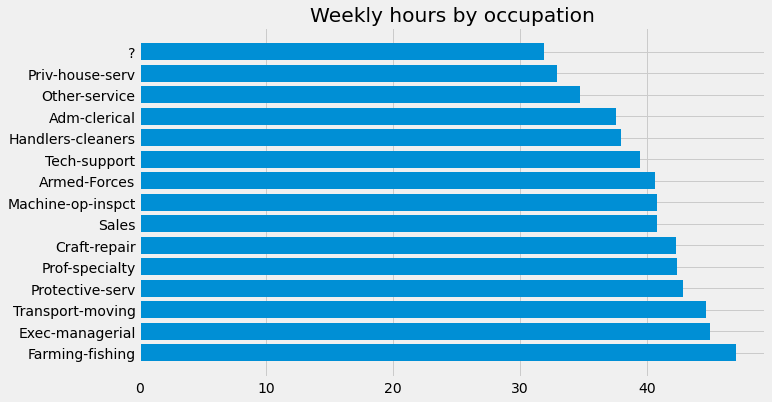

In [44]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()